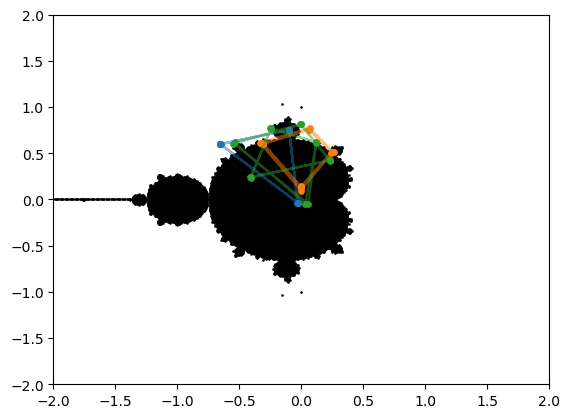

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass

@dataclass
class MandelbrotSet:
    max_iterations: int

    def is_stable(self, c: complex) -> int:
        """Returns the number of iterations before a point escapes, or max_iterations if it doesn't."""
        z = 0
        for iteration in range(self.max_iterations):
            z = z**2 + c
            if abs(z) > 2:
                return iteration
        return self.max_iterations
    def thingy(self, x_min, x_max, y_min, y_max, width, height):
        x = np.linspace(x_min, x_max, width)
        y = np.linspace(y_min, y_max, height)
        x_=[]
        y_=[]
        for i, y_val in enumerate(y):
            for j, x_val in enumerate(x):
                c = complex(x_val, y_val)
                if self.is_stable(c) == max_iterations:
                    x_.append(c.real)
                    y_.append(c.imag)
        plt.scatter(x_, y_,s=0.75, color="black", alpha=1)
    def trajectory(self, c: complex, t_iterations):
        tx_list=[]
        ty_list=[]
        n=1
        z=c
        tx_list.append(z.real)
        ty_list.append(z.imag)
        while n < t_iterations:
            z = z**2 + c
            tx_list.append(z.real)
            ty_list.append(z.imag)
            n=n+1
            if abs(z)>5:
                n=t_iterations+1
        plt.plot(tx_list, ty_list, alpha=.5)
        plt.scatter(tx_list, ty_list, s=15)
        
    def lma(self, x_min):
        x__=[]
        y__=[]
        l=0
        c=0
        while c>x_min:
            c=0-(.5*l)-(.25*l*l)
            y=0
            n=0
            while n<100:
                y=(y*y)+c
                n=n+1
                if abs(y)>5:
                    n=1000
            while n<130:
                x__.append(c)
                y__.append(y)
                y=(y*y)+c
                n=n+1
                if abs(y)>5:
                    n=1000
            l=l+.001
        
        plt.scatter(x__, y__, s=0.01, color="black", alpha=1)
    
if 1 == 1:
    # Mandelbrot parameters
    max_iterations = 1000
    width, height = 401, 401
    t_iterations= 20

    # Zoom into a specific region
    #center_x, center_y = -0.747348, 0.10031  # Example: center of the famous "seahorse valley"
    #zoom_width, zoom_height = 0.0001, 0.0001 # Smaller values = higher zoom
    center_x, center_y = 0, 0  # Example: center of the famous "seahorse valley"
    zoom_width, zoom_height = 4, 4 # Smaller values = higher zoom
    x_min = center_x - zoom_width / 2
    x_max = center_x + zoom_width / 2
    y_min = center_y - zoom_height / 2
    y_max = center_y + zoom_height / 2

    fig, ax = plt.subplots()
    mandelbrot = MandelbrotSet(max_iterations=max_iterations)
    mandelbrot.thingy(x_min, x_max, y_min, y_max, width, height)
    c = complex(-.1, .75)
    mandelbrot.trajectory(c, t_iterations)
    c = complex(.26, .51)
    mandelbrot.trajectory(c, t_iterations)
    c = complex(.12, .62)
    mandelbrot.trajectory(c, t_iterations)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.show